In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_excel('Volve production data.xlsx')

In [3]:
data.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [4]:
data.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [5]:
df = data[['DATEPRD', 'NPD_WELL_BORE_NAME','ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
          'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'DP_CHOKE_SIZE','AVG_WHT_P',
          'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL']]

In [6]:
type(df['NPD_WELL_BORE_NAME'])

pandas.core.series.Series

In [7]:
df.columns

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'DP_CHOKE_SIZE', 'AVG_WHT_P',
       'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL'],
      dtype='object')

In [8]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15349.000000,8980.000000,8980.000000,8980.000000,8919.000000,9155.000000,15340.000000,9146.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,19.994093,181.803869,77.162969,154.028787,55.168533,45.377811,11.441060,67.728440,1095.631548,161049.059703,1672.151332,5315.480815
std,8.369978,109.712363,45.657948,76.752373,36.692924,24.752631,19.816928,27.719028,1323.538151,188136.410434,1706.982853,2181.486695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.000000
25%,24.000000,0.000000,0.000000,83.665361,18.952989,31.148062,0.000000,56.577834,190.690000,29430.590000,19.870000,4338.204674
50%,24.000000,232.896939,103.186689,175.588861,52.096877,37.933620,2.384969,80.071250,557.550000,87749.660000,1097.790000,5504.739769
75%,24.000000,255.401455,106.276591,204.319964,99.924288,57.101268,13.765020,88.062202,1345.200000,202482.300000,3260.950000,6781.058040
max,25.000000,397.588550,108.502178,345.906770,100.000000,137.311030,125.718570,93.509584,5901.840000,851131.520000,8019.740000,10013.600000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 14 columns):
DATEPRD                     15634 non-null datetime64[ns]
NPD_WELL_BORE_NAME          15634 non-null object
ON_STREAM_HRS               15349 non-null float64
AVG_DOWNHOLE_PRESSURE       8980 non-null float64
AVG_DOWNHOLE_TEMPERATURE    8980 non-null float64
AVG_DP_TUBING               8980 non-null float64
AVG_CHOKE_SIZE_P            8919 non-null float64
AVG_WHP_P                   9155 non-null float64
DP_CHOKE_SIZE               15340 non-null float64
AVG_WHT_P                   9146 non-null float64
BORE_OIL_VOL                9161 non-null float64
BORE_GAS_VOL                9161 non-null float64
BORE_WAT_VOL                9161 non-null float64
BORE_WI_VOL                 5706 non-null float64
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.7+ MB


In [10]:
df.iloc[:,:]

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
0,2014-04-07,15/9-F-1 C,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,NaN
1,2014-04-08,15/9-F-1 C,0.00000,NaN,NaN,NaN,1.003059,0.000000,0.000000,0.000000,0.00,0.00,0.00,NaN
2,2014-04-09,15/9-F-1 C,0.00000,NaN,NaN,NaN,0.979008,0.000000,0.000000,0.000000,0.00,0.00,0.00,NaN
3,2014-04-10,15/9-F-1 C,0.00000,NaN,NaN,NaN,0.545759,0.000000,0.000000,0.000000,0.00,0.00,0.00,NaN
4,2014-04-11,15/9-F-1 C,0.00000,310.376140,96.875890,277.278260,1.215987,33.097880,33.071950,10.479920,0.00,0.00,0.00,NaN
5,2014-04-12,15/9-F-1 C,0.00000,303.500780,96.923390,281.447440,3.087015,22.053340,22.053340,8.704290,0.00,0.00,0.00,NaN
6,2014-04-13,15/9-F-1 C,0.00000,303.534810,96.958850,276.032000,1.962365,27.502810,16.163260,9.423150,0.00,0.00,0.00,NaN
7,2014-04-14,15/9-F-1 C,0.00000,303.782280,96.968730,282.786760,0.000000,20.995520,20.737120,8.131370,0.00,0.00,0.00,NaN
8,2014-04-15,15/9-F-1 C,0.00000,303.858210,97.021360,289.940670,31.141856,13.917540,12.181530,8.498330,0.00,0.00,0.00,NaN
9,2014-04-16,15/9-F-1 C,0.00000,303.791870,97.065690,299.671930,0.000000,4.119940,1.490200,8.821240,0.00,0.00,0.00,NaN


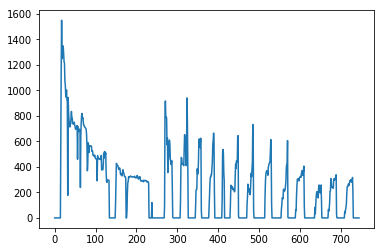

In [11]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'].BORE_OIL_VOL)

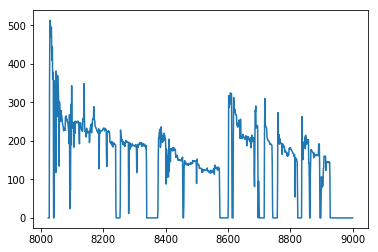

In [12]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-15 D'].BORE_OIL_VOL)

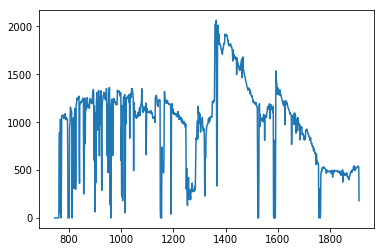

In [13]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-11'].BORE_OIL_VOL)

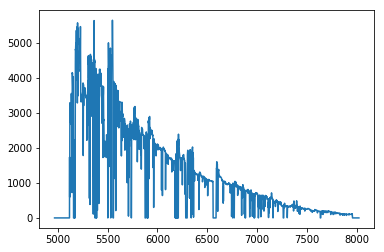

In [14]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-14'].BORE_OIL_VOL)

In [15]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [16]:
trace = go.Scatter(y = df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-14'].BORE_OIL_VOL)
data = [trace]
layout = dict(title = "Data before applied feature engineering")
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

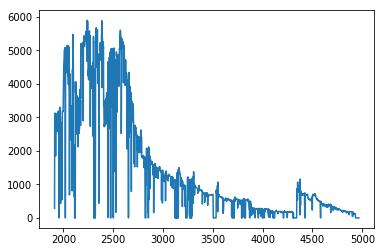

In [17]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-12'].BORE_OIL_VOL)

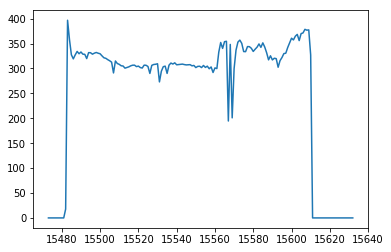

In [18]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-5'].BORE_OIL_VOL)

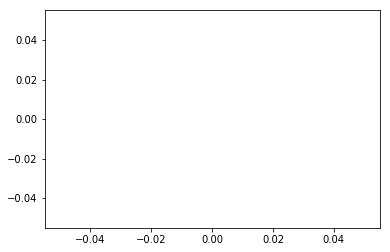

In [19]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-4'].BORE_OIL_VOL)

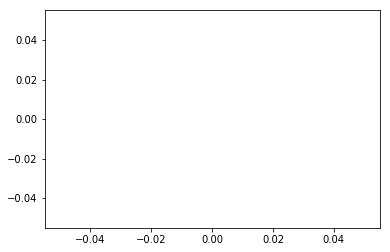

In [20]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-4'].BORE_GAS_VOL)

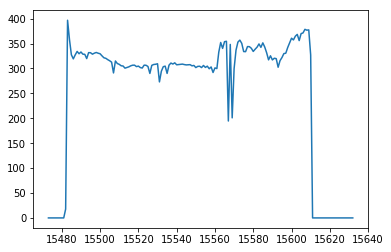

In [21]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-5'].BORE_OIL_VOL)

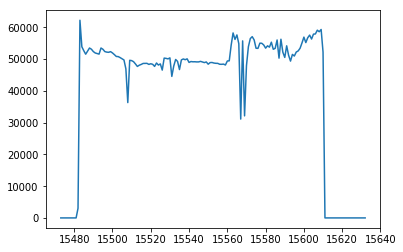

In [22]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-5'].BORE_GAS_VOL)

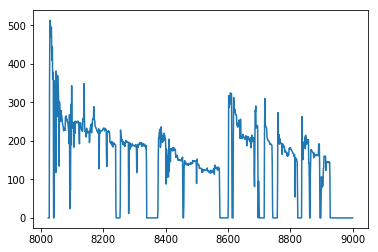

In [23]:
plt.plot(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-15 D'].BORE_OIL_VOL)

In [24]:
df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-4']["BORE_OIL_VOL"].isnull().sum()

3327

In [25]:
len(df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-4'])

3327

In [26]:
df['NPD_WELL_BORE_NAME'].value_counts().sum()

15634

In [27]:
df['NPD_WELL_BORE_NAME'].value_counts()

15/9-F-4       3327
15/9-F-5       3306
15/9-F-14      3056
15/9-F-12      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: NPD_WELL_BORE_NAME, dtype: int64

In [28]:
df.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
0,2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,277.27826,1.215987,33.09788,33.07195,10.47992,0.0,0.0,0.0,NaN


In [29]:
Well_1 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-4']
Well_2 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-5']
Well_3 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-12']
Well_4 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-14']
Well_5 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-11']
Well_6 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-15 D']
Well_7 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-1 C']

In [30]:
#Well_2.to_csv('F5.csv')
#Well_3.to_csv("F12.csv")
#Well_4.to_csv("F14.csv")
#Well_5.to_csv("F11.csv")
#Well_6.to_csv("F15.csv")
#Well_7.to_csv("F1.csv")

In [31]:
df['BORE_OIL_VOL'].sum()

10037080.610000001

In [32]:
df[(df["DATEPRD"] > '2014-01-01') & (df['DATEPRD'] < '2014-12-31')]['BORE_OIL_VOL'].sum()

740334.2

In [33]:
df[(df["DATEPRD"] >= '2008-01-01') & (df['DATEPRD'] < '2008-12-31')]['BORE_OIL_VOL'].sum()

1755358.93

In [34]:
start_date = '2010-01-01'
end_date = '2010-12-31'
mask = (df['DATEPRD'] >= start_date) & (df['DATEPRD'] <= end_date)
df.loc[mask]

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
2595,2010-01-01,15/9-F-12,24.00000,248.270880,107.054429,190.242300,73.834648,58.028580,24.471825,82.372921,5261.93,736984.71,790.98,NaN
2596,2010-01-02,15/9-F-12,24.00000,248.139878,107.058317,190.260880,74.126047,57.878998,24.326935,81.993231,5256.37,735525.78,847.96,NaN
2597,2010-01-03,15/9-F-12,24.00000,248.068057,107.061969,190.492418,74.230985,57.575639,24.018529,83.470902,5227.61,732785.12,793.61,NaN
2598,2010-01-04,15/9-F-12,24.00000,248.100170,107.066580,190.518866,74.065029,57.581304,24.026450,83.294239,5199.02,730335.59,749.92,NaN
2599,2010-01-05,15/9-F-12,24.00000,248.050761,107.071510,190.488746,74.136041,57.562016,24.008132,82.920042,5206.38,731148.30,541.74,NaN
2600,2010-01-06,15/9-F-12,24.00000,248.050173,107.076644,190.445681,74.093920,57.604492,24.060416,82.804264,5200.27,729365.98,550.93,NaN
2601,2010-01-07,15/9-F-12,24.00000,248.007229,107.081781,190.583693,72.824861,57.423536,23.876861,83.042402,5189.62,728597.69,709.95,NaN
2602,2010-01-08,15/9-F-12,24.00000,247.997426,107.087056,190.689955,72.940070,57.307471,23.778503,82.998757,5185.95,727881.15,579.99,NaN
2603,2010-01-09,15/9-F-12,22.83333,255.407906,107.010403,188.034915,60.410227,67.372991,34.554519,79.292855,4034.53,592005.17,515.07,NaN
2604,2010-01-10,15/9-F-12,24.00000,248.433974,107.071201,190.299039,71.872586,58.134934,24.397160,81.514339,5140.65,720907.51,606.10,NaN


In [35]:
df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-14']

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.05885,0.00000,0.0,0.0,0.0,NaN
4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.06768,0.00000,0.0,0.0,0.0,NaN
4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.04950,0.00000,0.0,0.0,0.0,NaN
4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.06640,0.00000,0.0,0.0,0.0,NaN
4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.10479,0.00000,0.0,0.0,0.0,NaN
4972,2008-02-17,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.13571,0.00000,0.0,0.0,0.0,NaN
4973,2008-02-18,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.23359,0.00000,0.0,0.0,0.0,NaN
4974,2008-02-19,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.56651,0.00000,0.0,0.0,0.0,NaN
4975,2008-02-20,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.61350,0.00002,0.0,0.0,0.0,NaN
4976,2008-02-21,15/9-F-14,0.0,0.0,0.0,0.00000,NaN,0.00000,0.73982,0.00000,0.0,0.0,0.0,NaN


In [36]:
df = df.loc[df['NPD_WELL_BORE_NAME'] == '15/9-F-14']

In [37]:
Well_2.isnull().sum()

DATEPRD                        0
NPD_WELL_BORE_NAME             0
ON_STREAM_HRS                133
AVG_DOWNHOLE_PRESSURE       3306
AVG_DOWNHOLE_TEMPERATURE    3306
AVG_DP_TUBING               3306
AVG_CHOKE_SIZE_P            3146
AVG_WHP_P                   3146
DP_CHOKE_SIZE                134
AVG_WHT_P                   3155
BORE_OIL_VOL                3146
BORE_GAS_VOL                3146
BORE_WAT_VOL                3146
BORE_WI_VOL                  590
dtype: int64

In [38]:
Well_3.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,3056.00000,3050.000000,3050.000000,3050.000000,3012.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,0.0
mean,21.33641,80.729072,33.292076,84.765924,69.254352,47.973013,19.292670,78.623925,1498.563334,218436.609300,2236.034152,NaN
std,6.88915,120.086902,49.354533,72.511534,30.179952,24.305518,22.750867,20.275990,1662.851799,235250.885353,1952.408547,NaN
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,NaN
25%,24.00000,0.000000,0.000000,32.454825,48.894109,32.421836,3.966373,78.420291,266.222500,41004.987500,156.872500,NaN
50%,24.00000,0.000000,0.000000,38.721292,70.724595,38.445743,7.502564,82.924712,697.655000,107734.345000,1349.840000,NaN
75%,24.00000,239.422752,106.048231,171.190061,99.998130,59.598066,27.428521,90.159986,2404.467500,344820.467500,4397.452500,NaN
max,25.00000,317.701150,107.507552,314.409160,100.000000,137.311030,124.122990,92.458642,5901.840000,851131.520000,8019.740000,NaN


In [39]:
Well_3.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
1911,2008-02-12,15/9-F-12,11.50,308.055940,104.418090,201.250000,14.484431,106.805939,92.475107,16.294718,284.65,38888.67,385.01,NaN
1912,2008-02-13,15/9-F-12,24.00,303.033518,105.402696,182.144942,22.832986,120.888576,89.620148,53.374330,1869.70,285246.16,7.13,NaN
1913,2008-02-14,15/9-F-12,22.50,295.586061,105.775486,181.867887,31.249966,113.718175,80.120465,72.737631,3124.09,509954.88,1.16,NaN
1914,2008-02-15,15/9-F-12,23.15,297.662702,105.751875,180.832060,28.518930,116.830642,84.250990,69.995943,2608.28,383426.67,0.97,NaN
1915,2008-02-16,15/9-F-12,24.00,295.935519,105.811114,180.501045,30.227902,115.434474,82.359026,71.518347,3051.80,418474.00,4.89,NaN


In [40]:
df = Well_3[['DATEPRD', 'ON_STREAM_HRS', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P', 'DP_CHOKE_SIZE','AVG_WHP_P', 'AVG_WHT_P','BORE_OIL_VOL',
            'BORE_GAS_VOL', 'BORE_WAT_VOL']]

In [41]:
df.describe()

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3056.00000,3050.000000,3012.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000
mean,21.33641,84.765924,69.254352,19.292670,47.973013,78.623925,1498.563334,218436.609300,2236.034152
std,6.88915,72.511534,30.179952,22.750867,24.305518,20.275990,1662.851799,235250.885353,1952.408547
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000
25%,24.00000,32.454825,48.894109,3.966373,32.421836,78.420291,266.222500,41004.987500,156.872500
50%,24.00000,38.721292,70.724595,7.502564,38.445743,82.924712,697.655000,107734.345000,1349.840000
75%,24.00000,171.190061,99.998130,27.428521,59.598066,90.159986,2404.467500,344820.467500,4397.452500
max,25.00000,314.409160,100.000000,124.122990,137.311030,92.458642,5901.840000,851131.520000,8019.740000


In [42]:
df[(df['BORE_OIL_VOL'] < 2000) & (df['BORE_OIL_VOL'] > 1000)]

,DATEPRD,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
1912,2008-02-13,24.00000,182.144942,22.832986,89.620148,120.888576,53.374330,1869.70,285246.16,7.13
1922,2008-02-23,15.14167,179.485698,28.957180,79.162219,112.602726,69.597023,1851.72,252078.00,0.28
1958,2008-03-30,10.97500,173.372950,30.682609,66.019200,97.369432,73.105592,1430.95,137396.40,1.55
1959,2008-03-31,14.02500,173.435491,31.000000,67.129073,98.121524,70.451536,1950.58,378532.95,1.93
1971,2008-04-12,12.97500,170.859063,30.885045,61.656020,93.149157,73.894956,1615.37,242280.01,2.91
1976,2008-04-17,9.37500,170.166082,31.653476,61.079362,92.811526,74.870691,1120.57,184080.60,1.10
1986,2008-04-27,15.95833,169.705849,31.489733,58.910786,90.711550,75.758360,1985.59,350826.25,2.76
2120,2008-09-10,23.60000,176.261543,22.269454,67.130429,97.283973,40.060641,1181.97,173052.95,1.53
2307,2009-03-16,13.00000,205.126210,36.100000,59.012640,85.281570,49.365780,1409.33,193531.67,0.00
2445,2009-08-02,10.65833,173.077390,46.086701,46.042739,77.954631,79.133086,1632.31,239745.52,48.30


In [43]:
df[(df['AVG_WHT_P'] < 10) & (df['BORE_OIL_VOL'] > 1)]["BORE_OIL_VOL"]

Series([], Name: BORE_OIL_VOL, dtype: float64)

In [44]:
df[(df['AVG_WHT_P'] < 10)]

,DATEPRD,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
1955,2008-03-27,0.0,282.53217,NaN,1.16410,1.17817,6.73056,0.0,0.0,0.0
2317,2009-03-26,0.0,266.84406,NaN,11.70234,12.39341,5.91033,0.0,0.0,0.0
2318,2009-03-27,0.0,261.18032,NaN,18.04363,18.43120,5.71318,0.0,0.0,0.0
2319,2009-03-28,0.0,208.87534,NaN,70.95891,71.02606,5.50221,0.0,0.0,0.0
2320,2009-03-29,0.0,109.57845,NaN,79.18718,79.22405,3.67632,0.0,0.0,0.0
2653,2010-03-02,0.0,190.06330,NaN,110.61173,111.52450,5.71538,0.0,0.0,0.0
3227,2011-10-19,0.0,85.58313,1.262077,85.58313,85.58313,8.01002,0.0,0.0,0.0
3228,2011-10-20,0.0,85.31438,1.316216,85.31438,85.31438,7.28108,0.0,0.0,0.0
3229,2011-10-21,0.0,86.83386,1.157105,86.83386,86.83386,9.97424,0.0,0.0,0.0
3691,2013-03-13,0.0,11.09376,6.229960,14.64170,11.09376,5.56271,0.0,0.0,0.0


In [45]:
df[(df['BORE_OIL_VOL'] < 10)]

,DATEPRD,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
1955,2008-03-27,0.000,282.53217,NaN,1.16410,1.17817,6.73056,0.0,0.00,0.0
2019,2008-05-31,0.000,279.66517,0.000000,2.33528,1.34677,21.78464,0.0,0.00,0.0
2113,2008-09-03,0.000,169.72392,NaN,75.04367,106.78282,18.16865,0.0,0.00,0.0
2114,2008-09-04,0.000,172.18105,NaN,80.95526,104.63666,14.34800,0.0,0.00,0.0
2115,2008-09-05,0.000,172.61023,NaN,83.34081,104.48797,15.50821,0.0,0.00,0.0
2119,2008-09-09,0.000,170.39022,NaN,106.81032,106.92182,19.20893,0.0,0.00,0.0
2305,2009-03-14,0.000,261.30658,NaN,38.13867,38.14768,13.14094,0.0,0.00,0.0
2308,2009-03-17,0.000,259.54431,NaN,28.12041,35.35445,17.09135,0.0,0.00,0.0
2317,2009-03-26,0.000,266.84406,NaN,11.70234,12.39341,5.91033,0.0,0.00,0.0
2318,2009-03-27,0.000,261.18032,NaN,18.04363,18.43120,5.71318,0.0,0.00,0.0


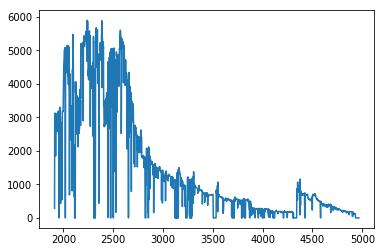

In [46]:
plt.plot(df.BORE_OIL_VOL)

In [47]:
df.drop(df.loc[df['BORE_OIL_VOL'] < 10].index, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



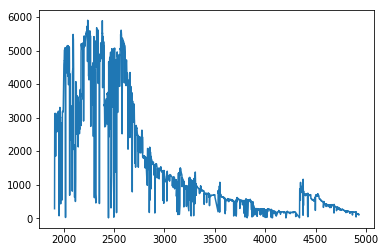

In [48]:
plt.plot(df.BORE_OIL_VOL)

In [49]:
df.describe()

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2832.000000,2826.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000
mean,23.018124,85.206636,73.415955,17.482829,47.622558,83.827104,1617.086698,235712.578446,2412.722228
std,3.548602,71.389880,25.998139,18.609087,20.196765,7.877910,1670.969850,235899.683750,1920.263164
min,0.250000,25.842671,0.600000,0.255408,0.000000,16.056460,10.200000,1291.910000,-457.840000
25%,24.000000,32.551998,51.049644,4.095756,32.551585,79.447409,361.800000,55079.647500,561.450000
50%,24.000000,38.583749,74.682963,7.384826,38.594562,85.801752,743.380000,118610.825000,2138.480000
75%,24.000000,172.104595,100.000000,26.458883,58.872134,90.321923,2666.945000,377328.355000,4481.485000
max,25.000000,259.087354,100.000000,106.035140,120.888576,92.458642,5901.840000,851131.520000,8019.740000


In [50]:
df[df['BORE_OIL_VOL'] < 11]

,DATEPRD,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
4206,2014-08-19,1.325,33.104632,16.994117,6.099075,33.104632,89.975262,10.2,2443.0,382.81


In [51]:
df[(df['ON_STREAM_HRS'] < 10)]

,DATEPRD,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
1954,2008-03-26,7.47500,173.521833,30.925418,66.578496,97.896706,75.259573,960.26,113341.21,1.64
1956,2008-03-28,1.19167,187.175029,21.333333,68.206761,92.241196,24.100000,73.44,48936.44,0.13
1972,2008-04-13,4.00000,174.478069,25.822956,63.311450,93.617627,48.682360,429.77,65731.44,1.73
1976,2008-04-17,9.37500,170.166082,31.653476,61.079362,92.811526,74.870691,1120.57,184080.60,1.10
1987,2008-04-29,5.24630,174.685083,25.843103,60.106446,89.004809,51.514422,546.58,90823.83,4.76
2020,2008-06-01,0.50000,188.029470,16.827690,72.697430,91.389630,22.054890,22.94,11729.20,0.04
2061,2008-07-12,6.30833,174.676049,32.110651,68.707487,100.154573,61.969506,686.84,151768.25,1.58
2086,2008-08-06,7.52500,172.611262,36.887088,63.381546,95.316337,76.141638,919.75,135274.51,1.38
2087,2008-08-08,6.97500,172.603850,28.200863,69.071242,101.598663,62.004395,808.23,110780.18,1.21
2112,2008-09-02,9.70833,170.302980,32.688219,65.908479,97.837781,71.390400,837.23,116783.59,0.49


In [52]:
df.isnull().sum()

DATEPRD             0
ON_STREAM_HRS       0
AVG_DP_TUBING       6
AVG_CHOKE_SIZE_P    0
DP_CHOKE_SIZE       0
AVG_WHP_P           0
AVG_WHT_P           0
BORE_OIL_VOL        0
BORE_GAS_VOL        0
BORE_WAT_VOL        0
dtype: int64

In [53]:
df.isna().sum()

DATEPRD             0
ON_STREAM_HRS       0
AVG_DP_TUBING       6
AVG_CHOKE_SIZE_P    0
DP_CHOKE_SIZE       0
AVG_WHP_P           0
AVG_WHT_P           0
BORE_OIL_VOL        0
BORE_GAS_VOL        0
BORE_WAT_VOL        0
dtype: int64

In [54]:
df.isnull().values.any()

True

In [55]:
np.where(np.asanyarray(np.isnan(df)))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [56]:
df.iloc[320:330,:]['AVG_DP_TUBING'].mean()

176.71315852460884

In [57]:
value = df.iloc[320:330,:]['AVG_DP_TUBING'].mean()
df.fillna(value = value, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [58]:
df.iloc[320:330,:]['AVG_DP_TUBING']

2237    179.770173
2238    172.958867
2239    176.713159
2240    176.713159
2241    176.713159
2242    176.713159
2243    176.713159
2244    176.713159
2245    174.816293
2246    179.307302
Name: AVG_DP_TUBING, dtype: float64

In [59]:
df[df['BORE_WAT_VOL'] < 0]

,DATEPRD,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
1982,2008-04-23,24.000,168.697955,31.487273,60.253108,91.859980,73.584250,2735.53,422115.01,-14.19
3502,2012-08-13,0.625,50.951032,21.991569,21.297284,50.951032,89.012162,632.96,12123.37,-457.84


In [60]:
df['BORE_WAT_VOL'] = df['BORE_WAT_VOL'].apply(lambda x: abs(x))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [61]:
df.describe()

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000
mean,23.018124,85.400506,73.415955,17.482829,47.622558,83.827104,1617.086698,235712.578446,2413.055583
std,3.548602,71.438243,25.998139,18.609087,20.196765,7.877910,1670.969850,235899.683750,1919.844097
min,0.250000,25.842671,0.600000,0.255408,0.000000,16.056460,10.200000,1291.910000,0.000000
25%,24.000000,32.553272,51.049644,4.095756,32.551585,79.447409,361.800000,55079.647500,561.450000
50%,24.000000,38.658681,74.682963,7.384826,38.594562,85.801752,743.380000,118610.825000,2138.480000
75%,24.000000,172.337131,100.000000,26.458883,58.872134,90.321923,2666.945000,377328.355000,4481.485000
max,25.000000,259.087354,100.000000,106.035140,120.888576,92.458642,5901.840000,851131.520000,8019.740000


In [62]:
df[df['AVG_WHP_P'] <10]

,DATEPRD,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2022,2008-06-03,24.0,259.087354,43.221762,33.464764,0.000000,79.212919,4999.75,755898.39,9.67
2023,2008-06-04,24.0,257.434314,43.421707,32.429749,1.029739,77.898597,5067.01,764495.52,9.80


In [63]:
df.index

Int64Index([1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
            ...
            4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930],
           dtype='int64', length=2832)

In [64]:
df.iloc[80:140,:]['AVG_WHP_P'].mean()

79.8813391856427

In [65]:
df['AVG_WHP_P'] = df['AVG_WHP_P'].apply(lambda x: x + 80 if x < 10 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [66]:
df.describe()

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000
mean,23.018124,85.400506,73.415955,17.482829,47.679055,83.827104,1617.086698,235712.578446,2413.055583
std,3.548602,71.438243,25.998139,18.609087,20.176787,7.877910,1670.969850,235899.683750,1919.844097
min,0.250000,25.842671,0.600000,0.255408,25.842671,16.056460,10.200000,1291.910000,0.000000
25%,24.000000,32.553272,51.049644,4.095756,32.553272,79.447409,361.800000,55079.647500,561.450000
50%,24.000000,38.658681,74.682963,7.384826,38.658681,85.801752,743.380000,118610.825000,2138.480000
75%,24.000000,172.337131,100.000000,26.458883,58.926380,90.321923,2666.945000,377328.355000,4481.485000
max,25.000000,259.087354,100.000000,106.035140,120.888576,92.458642,5901.840000,851131.520000,8019.740000


In [67]:
df[df['BORE_WAT_VOL'] < 100].count()

DATEPRD             487
ON_STREAM_HRS       487
AVG_DP_TUBING       487
AVG_CHOKE_SIZE_P    487
DP_CHOKE_SIZE       487
AVG_WHP_P           487
AVG_WHT_P           487
BORE_OIL_VOL        487
BORE_GAS_VOL        487
BORE_WAT_VOL        487
dtype: int64

In [68]:
df['BORE_WAT_VOL'] = df['BORE_WAT_VOL'].apply(lambda x: x + 10 if x < 100 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [69]:
df.describe()

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000
mean,23.018124,85.400506,73.415955,17.482829,47.679055,83.827104,1617.086698,235712.578446,2414.775215
std,3.548602,71.438243,25.998139,18.609087,20.176787,7.877910,1670.969850,235899.683750,1917.699565
min,0.250000,25.842671,0.600000,0.255408,25.842671,16.056460,10.200000,1291.910000,10.000000
25%,24.000000,32.553272,51.049644,4.095756,32.553272,79.447409,361.800000,55079.647500,561.450000
50%,24.000000,38.658681,74.682963,7.384826,38.658681,85.801752,743.380000,118610.825000,2138.480000
75%,24.000000,172.337131,100.000000,26.458883,58.926380,90.321923,2666.945000,377328.355000,4481.485000
max,25.000000,259.087354,100.000000,106.035140,120.888576,92.458642,5901.840000,851131.520000,8019.740000


In [70]:
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
1911,2008-02-12,11.50,201.250000,14.484431,92.475107,106.805939,16.294718,284.65,38888.67,385.01
1912,2008-02-13,24.00,182.144942,22.832986,89.620148,120.888576,53.374330,1869.70,285246.16,17.13
1913,2008-02-14,22.50,181.867887,31.249966,80.120465,113.718175,72.737631,3124.09,509954.88,11.16
1914,2008-02-15,23.15,180.832060,28.518930,84.250990,116.830642,69.995943,2608.28,383426.67,10.97
1915,2008-02-16,24.00,180.501045,30.227902,82.359026,115.434474,71.518347,3051.80,418474.00,14.89


In [71]:
df.to_csv('F12.csv')

In [72]:
df = Well_4[['DATEPRD','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P',
             'DP_CHOKE_SIZE','AVG_WHP_P', 'AVG_WHT_P','BORE_OIL_VOL',
            'BORE_GAS_VOL', 'BORE_WAT_VOL']]

In [73]:
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
4967,2008-02-12,0.0,0.0,0.0,0.0,NaN,0.05885,0.0,0.0,0.0,0.0,0.0
4968,2008-02-13,0.0,0.0,0.0,0.0,NaN,0.06768,0.0,0.0,0.0,0.0,0.0
4969,2008-02-14,0.0,0.0,0.0,0.0,NaN,0.04950,0.0,0.0,0.0,0.0,0.0
4970,2008-02-15,0.0,0.0,0.0,0.0,NaN,0.06640,0.0,0.0,0.0,0.0,0.0
4971,2008-02-16,0.0,0.0,0.0,0.0,NaN,0.10479,0.0,0.0,0.0,0.0,0.0


In [74]:
df[df['BORE_OIL_VOL'] < 100].count()

DATEPRD                     376
ON_STREAM_HRS               376
AVG_DOWNHOLE_PRESSURE       376
AVG_DOWNHOLE_TEMPERATURE    376
AVG_DP_TUBING               376
AVG_CHOKE_SIZE_P            180
DP_CHOKE_SIZE               376
AVG_WHP_P                   376
AVG_WHT_P                   376
BORE_OIL_VOL                376
BORE_GAS_VOL                376
BORE_WAT_VOL                376
dtype: int64

In [75]:
df[(df['BORE_OIL_VOL'] < 100) & (df['BORE_OIL_VOL'] > 50)].count()

DATEPRD                     29
ON_STREAM_HRS               29
AVG_DOWNHOLE_PRESSURE       29
AVG_DOWNHOLE_TEMPERATURE    29
AVG_DP_TUBING               29
AVG_CHOKE_SIZE_P            29
DP_CHOKE_SIZE               29
AVG_WHP_P                   29
AVG_WHT_P                   29
BORE_OIL_VOL                29
BORE_GAS_VOL                29
BORE_WAT_VOL                29
dtype: int64

In [76]:
df[(df['BORE_OIL_VOL'] < 100) & (df['BORE_OIL_VOL'] > 1)].count()

DATEPRD                     43
ON_STREAM_HRS               43
AVG_DOWNHOLE_PRESSURE       43
AVG_DOWNHOLE_TEMPERATURE    43
AVG_DP_TUBING               43
AVG_CHOKE_SIZE_P            43
DP_CHOKE_SIZE               43
AVG_WHP_P                   43
AVG_WHT_P                   43
BORE_OIL_VOL                43
BORE_GAS_VOL                43
BORE_WAT_VOL                43
dtype: int64

In [77]:
df[(df['BORE_OIL_VOL'] < 10) & (df['BORE_OIL_VOL'] > 0)]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
6878,2013-07-28,0.84167,260.621769,100.653070,229.547335,3.154279,5.058784,31.074435,87.594284,7.18,1118.54,43.54
6975,2013-11-03,6.02500,270.483360,99.910856,226.036504,9.051365,15.652889,44.446856,67.243330,5.75,856.02,31.69
7115,2014-03-25,6.60833,276.315119,99.696985,231.529063,10.146368,13.589076,44.786056,68.832164,9.81,1368.43,122.30
7262,2014-08-19,1.65833,265.717235,99.886985,234.309730,11.011189,6.070539,31.407505,87.963575,4.30,1030.09,55.70
7303,2014-09-29,1.25833,269.570500,99.717878,236.660564,10.411233,4.406401,32.909935,88.114783,5.42,1236.40,66.17


In [78]:
df.drop(df.loc[df['BORE_OIL_VOL'] < 1].index, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [79]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2723.000000,2717.000000,2717.000000,2717.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000
mean,23.052779,246.505180,101.647452,203.446155,72.825768,13.865308,43.920182,85.799942,1447.753724,212269.366743,2615.205516
std,3.434717,25.077625,8.742068,29.817071,27.696326,16.681871,18.264380,5.855309,1289.762525,182127.866011,1287.070817
min,0.625000,0.000000,0.000000,7.219360,2.485842,1.450701,0.000000,12.134665,4.300000,856.020000,-59.190000
25%,24.000000,240.602292,99.873083,187.245930,44.801287,2.629080,31.502547,85.336730,331.015000,50922.820000,2122.390000
50%,24.000000,247.191777,101.782098,205.512830,76.520197,5.703909,34.991646,87.379980,1041.770000,165199.990000,3099.820000
75%,24.000000,261.519886,105.141984,229.634981,100.000000,17.255315,49.880514,88.714644,2247.445000,329368.410000,3491.825000
max,25.000000,289.897009,106.772733,254.736958,100.000000,82.983969,115.184383,93.509584,5644.370000,789974.730000,5691.770000


In [80]:
df[df['AVG_WHP_P'] <10]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
5532,2009-09-04,3.00834,254.737025,104.645218,254.736958,19.458734,31.914504,0.000067,47.312896,293.98,39397.99,17.20
5533,2009-09-05,24.00000,244.992384,105.321207,244.992384,31.353000,32.445958,0.000000,80.332595,2247.25,269448.67,8.39
5534,2009-09-06,19.74167,247.912695,105.280917,247.422679,27.618741,31.176369,0.490016,80.543961,1802.88,257772.89,9.06


In [81]:
df.index

Int64Index([5118, 5119, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127,
            ...
            7947, 7948, 7949, 7950, 7951, 7952, 7953, 7954, 7955, 7956],
           dtype='int64', length=2723)

In [82]:
df.reset_index(inplace = True)

In [83]:
df[df['AVG_WHP_P'] <10]

,index,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
393,5532,2009-09-04,3.00834,254.737025,104.645218,254.736958,19.458734,31.914504,0.000067,47.312896,293.98,39397.99,17.20
394,5533,2009-09-05,24.00000,244.992384,105.321207,244.992384,31.353000,32.445958,0.000000,80.332595,2247.25,269448.67,8.39
395,5534,2009-09-06,19.74167,247.912695,105.280917,247.422679,27.618741,31.176369,0.490016,80.543961,1802.88,257772.89,9.06


In [84]:
df['AVG_WHP_P'] = df['AVG_WHP_P'].apply(lambda x: x + 2 if x < 10 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [85]:
df.describe()

,index,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2723.000000,2723.000000,2717.000000,2717.000000,2717.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000
mean,6550.039662,23.052779,246.505180,101.647452,203.446155,72.825768,13.865308,43.922385,85.799942,1447.753724,212269.366743,2615.205516
std,824.858504,3.434717,25.077625,8.742068,29.817071,27.696326,16.681871,18.259219,5.855309,1289.762525,182127.866011,1287.070817
min,5118.000000,0.625000,0.000000,0.000000,7.219360,2.485842,1.450701,2.000000,12.134665,4.300000,856.020000,-59.190000
25%,5824.500000,24.000000,240.602292,99.873083,187.245930,44.801287,2.629080,31.502547,85.336730,331.015000,50922.820000,2122.390000
50%,6548.000000,24.000000,247.191777,101.782098,205.512830,76.520197,5.703909,34.991646,87.379980,1041.770000,165199.990000,3099.820000
75%,7271.500000,24.000000,261.519886,105.141984,229.634981,100.000000,17.255315,49.880514,88.714644,2247.445000,329368.410000,3491.825000
max,7956.000000,25.000000,289.897009,106.772733,254.736958,100.000000,82.983969,115.184383,93.509584,5644.370000,789974.730000,5691.770000


In [86]:
df.isnull().sum()

index                       0
DATEPRD                     0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       6
AVG_DOWNHOLE_TEMPERATURE    6
AVG_DP_TUBING               6
AVG_CHOKE_SIZE_P            0
DP_CHOKE_SIZE               0
AVG_WHP_P                   0
AVG_WHT_P                   0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

In [87]:
np.where(np.asanyarray(np.isnan(df)))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [88]:
df.iloc[160:175,:]

,index,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
160,5289,2009-01-01,24.00000,249.414565,105.262069,157.806453,33.439270,58.970755,91.608111,77.075144,3478.64,506024.38,2.54
161,5290,2009-01-02,24.00000,250.697447,105.255735,157.807137,32.811870,60.346913,92.890309,77.033892,3363.80,488365.58,0.81
162,5291,2009-01-03,18.16666,251.823264,105.174041,158.274221,30.047938,61.287376,93.549044,74.828930,2216.90,323603.08,3.42
163,5292,2009-01-04,24.00000,250.740727,105.225996,157.715424,32.643291,60.446780,93.025303,77.824094,3347.77,484832.66,0.78
164,5293,2009-01-05,24.00000,250.451559,105.255507,158.144443,33.328217,59.647780,92.307116,78.574055,3495.80,506288.63,1.61
165,5294,2009-01-06,21.00000,250.786103,104.937750,157.756459,31.611170,60.269879,93.029643,74.040007,2649.25,386193.55,1.51
166,5295,2009-01-07,24.00000,NaN,NaN,NaN,32.370997,60.698254,93.353865,75.487206,3309.88,491311.06,1.51
167,5296,2009-01-08,24.00000,NaN,NaN,NaN,30.450363,63.580540,95.857762,74.082995,3054.02,440434.88,0.79
168,5297,2009-01-09,24.00000,NaN,NaN,NaN,28.121133,66.200793,98.476732,72.646676,2627.22,377383.98,0.66
169,5298,2009-01-10,24.00000,NaN,NaN,NaN,31.519896,63.246754,95.670009,74.346879,3259.45,468775.45,0.87


In [89]:
value = df.iloc[160:174,:]['AVG_DP_TUBING'].mean()
df['AVG_DP_TUBING'].fillna(value = value, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [90]:
value = df.iloc[160:174,:]['AVG_DOWNHOLE_PRESSURE'].mean()
df['AVG_DOWNHOLE_PRESSURE'].fillna(value = value, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [91]:
value = df.iloc[160:174,:]['AVG_DOWNHOLE_TEMPERATURE'].mean()
df['AVG_DOWNHOLE_TEMPERATURE'].fillna(value = value, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [92]:
df.iloc[160:174,:]

,index,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
160,5289,2009-01-01,24.00000,249.414565,105.262069,157.806453,33.439270,58.970755,91.608111,77.075144,3478.64,506024.38,2.54
161,5290,2009-01-02,24.00000,250.697447,105.255735,157.807137,32.811870,60.346913,92.890309,77.033892,3363.80,488365.58,0.81
162,5291,2009-01-03,18.16666,251.823264,105.174041,158.274221,30.047938,61.287376,93.549044,74.828930,2216.90,323603.08,3.42
163,5292,2009-01-04,24.00000,250.740727,105.225996,157.715424,32.643291,60.446780,93.025303,77.824094,3347.77,484832.66,0.78
164,5293,2009-01-05,24.00000,250.451559,105.255507,158.144443,33.328217,59.647780,92.307116,78.574055,3495.80,506288.63,1.61
165,5294,2009-01-06,21.00000,250.786103,104.937750,157.756459,31.611170,60.269879,93.029643,74.040007,2649.25,386193.55,1.51
166,5295,2009-01-07,24.00000,250.428981,105.063792,158.355535,32.370997,60.698254,93.353865,75.487206,3309.88,491311.06,1.51
167,5296,2009-01-08,24.00000,250.428981,105.063792,158.355535,30.450363,63.580540,95.857762,74.082995,3054.02,440434.88,0.79
168,5297,2009-01-09,24.00000,250.428981,105.063792,158.355535,28.121133,66.200793,98.476732,72.646676,2627.22,377383.98,0.66
169,5298,2009-01-10,24.00000,250.428981,105.063792,158.355535,31.519896,63.246754,95.670009,74.346879,3259.45,468775.45,0.87


In [93]:
df.describe()

,index,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000
mean,6550.039662,23.052779,246.513826,101.654980,203.346800,72.825768,13.865308,43.922385,85.799942,1447.753724,212269.366743,2615.205516
std,824.858504,3.434717,25.050646,8.733898,29.859166,27.696326,16.681871,18.259219,5.855309,1289.762525,182127.866011,1287.070817
min,5118.000000,0.625000,0.000000,0.000000,7.219360,2.485842,1.450701,2.000000,12.134665,4.300000,856.020000,-59.190000
25%,5824.500000,24.000000,240.658653,99.874868,186.996088,44.801287,2.629080,31.502547,85.336730,331.015000,50922.820000,2122.390000
50%,6548.000000,24.000000,247.278305,101.817322,205.485164,76.520197,5.703909,34.991646,87.379980,1041.770000,165199.990000,3099.820000
75%,7271.500000,24.000000,261.515255,105.135537,229.623702,100.000000,17.255315,49.880514,88.714644,2247.445000,329368.410000,3491.825000
max,7956.000000,25.000000,289.897009,106.772733,254.736958,100.000000,82.983969,115.184383,93.509584,5644.370000,789974.730000,5691.770000


In [94]:
df[df['AVG_DOWNHOLE_PRESSURE'] < 20 ]

,index,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
250,5383,2009-04-05,22.19167,0.0,0.0,81.858642,36.068174,49.167966,81.858642,78.890274,3873.72,547078.74,33.73
253,5388,2009-04-10,0.80833,0.0,0.0,86.930548,21.542910,54.352218,86.930548,73.891809,50.65,7190.41,0.05
254,5390,2009-04-12,13.85833,0.0,0.0,79.385957,34.449326,47.091022,79.385957,71.228733,2063.32,286054.45,3.05
255,5391,2009-04-13,24.00000,0.0,0.0,77.487499,36.929849,44.836729,77.487499,78.890691,3941.13,540977.58,7.70
256,5392,2009-04-14,24.00000,0.0,0.0,76.398335,37.222699,43.701661,76.398335,79.570445,3975.77,543293.15,2.65
257,5393,2009-04-15,4.47500,0.0,0.0,76.653536,34.275813,44.062157,76.653536,79.604041,651.67,95907.56,0.27
553,5696,2010-02-15,13.70000,0.0,0.0,69.259063,28.839026,38.152587,69.259063,74.335526,1006.27,137507.76,672.68
554,5697,2010-02-16,24.00000,0.0,0.0,59.768697,41.811064,27.405322,59.768697,86.366964,2652.06,372253.28,2368.23
555,5698,2010-02-17,24.00000,0.0,0.0,59.812914,41.785463,27.459889,59.812914,85.402790,2606.40,366025.93,2295.59
556,5699,2010-02-18,21.60000,0.0,0.0,61.798073,39.018513,29.239745,61.798073,84.573984,2141.69,300735.42,1978.55


In [95]:
df[df['AVG_DOWNHOLE_TEMPERATURE'] < 20 ]

,index,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
250,5383,2009-04-05,22.19167,0.0,0.0,81.858642,36.068174,49.167966,81.858642,78.890274,3873.72,547078.74,33.73
253,5388,2009-04-10,0.80833,0.0,0.0,86.930548,21.542910,54.352218,86.930548,73.891809,50.65,7190.41,0.05
254,5390,2009-04-12,13.85833,0.0,0.0,79.385957,34.449326,47.091022,79.385957,71.228733,2063.32,286054.45,3.05
255,5391,2009-04-13,24.00000,0.0,0.0,77.487499,36.929849,44.836729,77.487499,78.890691,3941.13,540977.58,7.70
256,5392,2009-04-14,24.00000,0.0,0.0,76.398335,37.222699,43.701661,76.398335,79.570445,3975.77,543293.15,2.65
257,5393,2009-04-15,4.47500,0.0,0.0,76.653536,34.275813,44.062157,76.653536,79.604041,651.67,95907.56,0.27
553,5696,2010-02-15,13.70000,0.0,0.0,69.259063,28.839026,38.152587,69.259063,74.335526,1006.27,137507.76,672.68
554,5697,2010-02-16,24.00000,0.0,0.0,59.768697,41.811064,27.405322,59.768697,86.366964,2652.06,372253.28,2368.23
555,5698,2010-02-17,24.00000,0.0,0.0,59.812914,41.785463,27.459889,59.812914,85.402790,2606.40,366025.93,2295.59
556,5699,2010-02-18,21.60000,0.0,0.0,61.798073,39.018513,29.239745,61.798073,84.573984,2141.69,300735.42,1978.55


In [96]:
df.iloc[240:280,:]['AVG_DOWNHOLE_PRESSURE'].mean()

187.48821048175475

In [97]:
df['AVG_DOWNHOLE_PRESSURE']= df['AVG_DOWNHOLE_PRESSURE'].apply(lambda x: x + df.iloc[240:280,:]['AVG_DOWNHOLE_PRESSURE'].mean() if x < 10 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [98]:
df.iloc[240:280,:]['AVG_DOWNHOLE_PRESSURE']

240    246.739328
241    244.065432
242    242.677458
243    244.295543
244    261.910180
245    247.088316
246    246.189732
247    244.240213
248    241.565636
249    142.195394
250    187.488210
251    238.779297
252    156.704604
253    187.488210
254    187.488210
255    187.488210
256    187.488210
257    187.488210
258    126.438256
259    227.887157
260    230.897444
261    238.391568
262    161.168309
263    223.687360
264    228.324332
265    222.068016
266    220.986588
267    220.166009
268    219.443621
269    219.075892
270    218.820243
271    218.583430
272    218.592703
273    218.694032
274    218.844007
275    218.825999
276    222.473316
277    224.940085
278    222.982751
279    221.786169
Name: AVG_DOWNHOLE_PRESSURE, dtype: float64

In [99]:
df.iloc[240:280,:]['AVG_DOWNHOLE_TEMPERATURE'].mean()

85.30616854289306

In [100]:
df['AVG_DOWNHOLE_TEMPERATURE']= df['AVG_DOWNHOLE_TEMPERATURE'].apply(lambda x: x + df.iloc[240:280,:]['AVG_DOWNHOLE_TEMPERATURE'].mean() if x < 10 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [101]:
df.describe()

,index,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000
mean,6550.039662,23.052779,247.546629,102.124900,203.346800,72.825768,13.865308,43.922385,85.799942,1447.753724,212269.366743,2615.205516
std,824.858504,3.434717,17.629230,4.537327,29.859166,27.696326,16.681871,18.259219,5.855309,1289.762525,182127.866011,1287.070817
min,5118.000000,0.625000,49.450440,20.959721,7.219360,2.485842,1.450701,2.000000,12.134665,4.300000,856.020000,-59.190000
25%,5824.500000,24.000000,240.658653,99.874868,186.996088,44.801287,2.629080,31.502547,85.336730,331.015000,50922.820000,2122.390000
50%,6548.000000,24.000000,247.278305,101.817322,205.485164,76.520197,5.703909,34.991646,87.379980,1041.770000,165199.990000,3099.820000
75%,7271.500000,24.000000,261.515255,105.135537,229.623702,100.000000,17.255315,49.880514,88.714644,2247.445000,329368.410000,3491.825000
max,7956.000000,25.000000,289.897009,106.772733,254.736958,100.000000,82.983969,115.184383,93.509584,5644.370000,789974.730000,5691.770000


In [102]:
df['BORE_WAT_VOL'] = df['BORE_WAT_VOL'].apply(lambda x: abs(x))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [103]:
df.describe()

,index,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000
mean,6550.039662,23.052779,247.546629,102.124900,203.346800,72.825768,13.865308,43.922385,85.799942,1447.753724,212269.366743,2615.249688
std,824.858504,3.434717,17.629230,4.537327,29.859166,27.696326,16.681871,18.259219,5.855309,1289.762525,182127.866011,1286.981027
min,5118.000000,0.625000,49.450440,20.959721,7.219360,2.485842,1.450701,2.000000,12.134665,4.300000,856.020000,0.000000
25%,5824.500000,24.000000,240.658653,99.874868,186.996088,44.801287,2.629080,31.502547,85.336730,331.015000,50922.820000,2122.390000
50%,6548.000000,24.000000,247.278305,101.817322,205.485164,76.520197,5.703909,34.991646,87.379980,1041.770000,165199.990000,3099.820000
75%,7271.500000,24.000000,261.515255,105.135537,229.623702,100.000000,17.255315,49.880514,88.714644,2247.445000,329368.410000,3491.825000
max,7956.000000,25.000000,289.897009,106.772733,254.736958,100.000000,82.983969,115.184383,93.509584,5644.370000,789974.730000,5691.770000


In [104]:
df[df['BORE_WAT_VOL'] < 1]

,index,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
40,5168,2008-09-02,15.29167,252.326412,104.234961,156.290415,26.226099,63.784325,96.035997,63.574050,1345.44,187673.22,0.79
41,5169,2008-09-03,24.00000,252.193299,104.540637,154.877553,26.846065,65.014949,97.315746,71.788387,2164.78,298774.41,0.80
42,5170,2008-09-04,24.00000,252.292855,104.579626,154.811674,27.028181,65.056365,97.481181,73.262280,2186.74,302139.38,0.86
43,5171,2008-09-05,24.00000,252.368589,104.605095,155.207745,27.188705,64.946884,97.160844,70.382541,2230.26,305847.41,0.81
44,5172,2008-09-06,16.87500,252.796314,104.615375,155.241186,26.669656,65.124498,97.555128,72.053244,1442.19,199286.09,0.75
109,5238,2008-11-11,24.00000,223.835537,105.096137,148.928325,35.808761,42.760607,74.907212,74.608270,3492.99,495927.25,0.85
112,5241,2008-11-14,24.00000,224.555459,105.109468,149.008852,35.730423,43.383432,75.546607,76.693674,3498.89,497601.80,0.90
113,5242,2008-11-15,24.00000,224.804689,105.112669,149.097977,35.756539,43.530336,75.706712,76.987181,3508.48,499260.80,0.81
114,5243,2008-11-16,24.00000,225.001704,105.114068,149.081671,35.767753,43.754915,75.920033,77.666214,3501.06,498776.51,0.89
115,5244,2008-11-17,24.00000,225.027259,105.115322,149.354091,35.799782,43.524999,75.673169,74.953376,3526.54,502342.59,0.84


In [105]:
df['BORE_WAT_VOL'] = df['BORE_WAT_VOL'].apply(lambda x: x + 10 if x < 100 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [106]:
df.describe()

,index,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000
mean,6550.039662,23.052779,247.546629,102.124900,203.346800,72.825768,13.865308,43.922385,85.799942,1447.753724,212269.366743,2616.344069
std,824.858504,3.434717,17.629230,4.537327,29.859166,27.696326,16.681871,18.259219,5.855309,1289.762525,182127.866011,1284.774245
min,5118.000000,0.625000,49.450440,20.959721,7.219360,2.485842,1.450701,2.000000,12.134665,4.300000,856.020000,10.000000
25%,5824.500000,24.000000,240.658653,99.874868,186.996088,44.801287,2.629080,31.502547,85.336730,331.015000,50922.820000,2122.390000
50%,6548.000000,24.000000,247.278305,101.817322,205.485164,76.520197,5.703909,34.991646,87.379980,1041.770000,165199.990000,3099.820000
75%,7271.500000,24.000000,261.515255,105.135537,229.623702,100.000000,17.255315,49.880514,88.714644,2247.445000,329368.410000,3491.825000
max,7956.000000,25.000000,289.897009,106.772733,254.736958,100.000000,82.983969,115.184383,93.509584,5644.370000,789974.730000,5691.770000


In [107]:
df.to_csv("F14.csv")

In [108]:
#Well_2.to_csv('F5.csv')
#Well_3.to_csv("F12.csv")
#Well_4.to_csv("F14.csv")
#Well_5.to_csv("F11.csv")
#Well_6.to_csv("F15.csv")
#Well_7.to_csv("F1.csv")

In [113]:
df = Well_5[['DATEPRD','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P',
             'DP_CHOKE_SIZE','AVG_WHP_P', 'AVG_WHT_P','BORE_OIL_VOL',
            'BORE_GAS_VOL', 'BORE_WAT_VOL']]

In [114]:
df[df['BORE_OIL_VOL'] < 10]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
746,2013-07-08,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
747,2013-07-09,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
748,2013-07-10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
749,2013-07-11,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
750,2013-07-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
751,2013-07-13,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
752,2013-07-14,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
753,2013-07-15,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
754,2013-07-16,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
755,2013-07-17,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0


In [115]:
df[(df['BORE_OIL_VOL'] < 100) & (df['BORE_OIL_VOL'] > 50)].count()

DATEPRD                     5
ON_STREAM_HRS               5
AVG_DOWNHOLE_PRESSURE       5
AVG_DOWNHOLE_TEMPERATURE    5
AVG_DP_TUBING               5
AVG_CHOKE_SIZE_P            5
DP_CHOKE_SIZE               5
AVG_WHP_P                   5
AVG_WHT_P                   5
BORE_OIL_VOL                5
BORE_GAS_VOL                5
BORE_WAT_VOL                5
dtype: int64

In [116]:
df[(df['BORE_OIL_VOL'] < 1)].count()

DATEPRD                     42
ON_STREAM_HRS               42
AVG_DOWNHOLE_PRESSURE       39
AVG_DOWNHOLE_TEMPERATURE    39
AVG_DP_TUBING               39
AVG_CHOKE_SIZE_P            40
DP_CHOKE_SIZE               39
AVG_WHP_P                   39
AVG_WHT_P                   39
BORE_OIL_VOL                42
BORE_GAS_VOL                42
BORE_WAT_VOL                42
dtype: int64

In [117]:
df.drop(df.loc[df['BORE_OIL_VOL'] < 1].index, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [118]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,1123.000000,1120.000000,1120.000000,1120.000000,1123.000000,1120.000000,1120.000000,1120.000000,1123.000000,1123.000000,1123.000000
mean,23.157806,235.057017,105.563072,183.125736,37.498953,24.352326,51.977929,70.069093,1022.127427,155218.629216,971.332386
std,3.430292,22.423710,5.657608,22.701318,38.042695,18.977703,20.110007,10.992308,400.592709,57381.016150,955.575294
min,0.000000,0.000000,0.000000,0.000000,1.443510,0.000000,0.000000,0.000000,10.710000,1756.770000,0.000000
25%,24.000000,220.126744,105.660747,167.805028,11.231890,4.647610,31.275718,63.375422,772.565000,120863.395000,154.790000
50%,24.000000,230.534067,105.940222,174.772699,14.976315,21.775802,51.088849,69.736391,1088.750000,164737.390000,530.080000
75%,24.000000,250.800398,106.323343,196.584528,97.916667,40.476835,69.102682,78.768389,1235.345000,188013.635000,2028.185000
max,25.000000,296.354607,106.699530,248.705198,100.000000,72.955190,102.219531,85.028862,2064.610000,300167.590000,3559.670000


In [119]:
df.isna().sum()

DATEPRD                     0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       3
AVG_DOWNHOLE_TEMPERATURE    3
AVG_DP_TUBING               3
AVG_CHOKE_SIZE_P            0
DP_CHOKE_SIZE               3
AVG_WHP_P                   3
AVG_WHT_P                   3
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

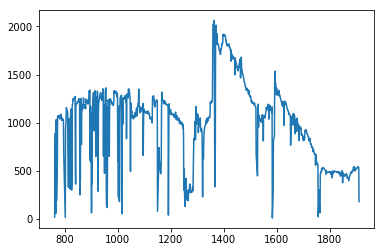

In [120]:
plt.plot(df['BORE_OIL_VOL'])

In [121]:
len(df)

1123

In [122]:
df[df['AVG_DOWNHOLE_PRESSURE'] < 10]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
762,2013-07-24,7.00,1.92627,0.3522,26.12304,3.256548,18.85147,28.04931,18.19463,17.85,2772.47,0.0
766,2013-07-28,0.84,0.00000,0.0000,0.00000,2.464222,0.00000,0.00000,0.00000,56.01,9011.77,0.0
767,2013-07-29,4.00,0.00000,0.0000,0.00000,2.536987,0.00000,0.00000,0.00000,123.59,18792.50,0.0


In [123]:
df[df['ON_STREAM_HRS'] < 1]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
766,2013-07-28,0.84,0.0,0.0,0.0,2.464222,0.0,0.0,0.0,56.01,9011.77,0.00
1301,2015-01-17,0.00,219.8,106.2,169.4,12.000000,21.0,50.4,64.8,1026.57,150773.50,461.02


In [124]:
df[df['AVG_DOWNHOLE_TEMPERATURE'] < 10]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
762,2013-07-24,7.00,1.92627,0.3522,26.12304,3.256548,18.85147,28.04931,18.19463,17.85,2772.47,0.0
766,2013-07-28,0.84,0.00000,0.0000,0.00000,2.464222,0.00000,0.00000,0.00000,56.01,9011.77,0.0
767,2013-07-29,4.00,0.00000,0.0000,0.00000,2.536987,0.00000,0.00000,0.00000,123.59,18792.50,0.0


In [125]:
df[df['AVG_DP_TUBING'] < 10]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
766,2013-07-28,0.84,0.0,0.0,0.0,2.464222,0.0,0.0,0.0,56.01,9011.77,0.0
767,2013-07-29,4.00,0.0,0.0,0.0,2.536987,0.0,0.0,0.0,123.59,18792.50,0.0


In [126]:
df.drop(df.loc[df['AVG_DP_TUBING'] < 1].index, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [128]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,1121.000000,1118.000000,1118.000000,1118.000000,1121.000000,1118.000000,1118.000000,1118.000000,1121.000000,1121.000000,1121.000000
mean,23.194805,235.477513,105.751915,183.453331,37.561394,24.395890,52.070913,70.194440,1023.790812,155470.754987,973.065361
std,3.318755,20.115099,3.475268,21.356974,38.047862,18.966664,20.007259,10.594368,399.003844,57119.987313,955.545351
min,0.000000,1.926270,0.352200,26.123040,1.443510,2.498848,24.303256,18.194630,10.710000,1756.770000,0.000000
25%,24.000000,220.135765,105.674596,167.814331,11.234318,4.661819,31.339417,63.387229,775.200000,121079.580000,155.700000
50%,24.000000,230.653940,105.940857,174.780601,15.049463,21.841616,51.097521,69.749520,1088.860000,164846.190000,534.820000
75%,24.000000,250.827288,106.324421,196.665531,97.916667,40.476943,69.104599,78.787068,1235.410000,188014.960000,2029.810000
max,25.000000,296.354607,106.699530,248.705198,100.000000,72.955190,102.219531,85.028862,2064.610000,300167.590000,3559.670000


In [129]:
df[df['ON_STREAM_HRS'] < 1]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
1301,2015-01-17,0.0,219.8,106.2,169.4,12.0,21.0,50.4,64.8,1026.57,150773.5,461.02


In [130]:
df.dropna(axis = 0  , inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [131]:
df['ON_STREAM_HRS'] = df['ON_STREAM_HRS'].apply(lambda x: x+ 0.2 if x < 1 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [132]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,23.192823,235.477513,105.751915,183.453331,37.636675,24.395890,52.070913,70.194440,1024.024347,155510.597853,975.676449
std,3.321701,20.115099,3.475268,21.356974,38.071094,18.966664,20.007259,10.594368,399.498392,57188.682629,955.494293
min,0.200000,1.926270,0.352200,26.123040,1.443510,2.498848,24.303256,18.194630,10.710000,1756.770000,0.000000
25%,24.000000,220.135765,105.674596,167.814331,11.244696,4.661819,31.339417,63.387229,773.782500,120982.230000,156.755000
50%,24.000000,230.653940,105.940857,174.780601,15.151183,21.841616,51.097521,69.749520,1089.055000,164897.790000,539.975000
75%,24.000000,250.827288,106.324421,196.665531,97.916667,40.476943,69.104599,78.787068,1236.115000,188041.817500,2031.085000
max,25.000000,296.354607,106.699530,248.705198,100.000000,72.955190,102.219531,85.028862,2064.610000,300167.590000,3559.670000


In [133]:
df[df['BORE_WAT_VOL'] <60].count()

DATEPRD                     56
ON_STREAM_HRS               56
AVG_DOWNHOLE_PRESSURE       56
AVG_DOWNHOLE_TEMPERATURE    56
AVG_DP_TUBING               56
AVG_CHOKE_SIZE_P            56
DP_CHOKE_SIZE               56
AVG_WHP_P                   56
AVG_WHT_P                   56
BORE_OIL_VOL                56
BORE_GAS_VOL                56
BORE_WAT_VOL                56
dtype: int64

In [134]:
df['BORE_WAT_VOL'] = df['BORE_WAT_VOL'].apply(lambda x: x + 10 if x < 100 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [135]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,23.192823,235.477513,105.751915,183.453331,37.636675,24.395890,52.070913,70.194440,1024.024347,155510.597853,976.919741
std,3.321701,20.115099,3.475268,21.356974,38.071094,18.966664,20.007259,10.594368,399.498392,57188.682629,954.298641
min,0.200000,1.926270,0.352200,26.123040,1.443510,2.498848,24.303256,18.194630,10.710000,1756.770000,10.000000
25%,24.000000,220.135765,105.674596,167.814331,11.244696,4.661819,31.339417,63.387229,773.782500,120982.230000,156.755000
50%,24.000000,230.653940,105.940857,174.780601,15.151183,21.841616,51.097521,69.749520,1089.055000,164897.790000,539.975000
75%,24.000000,250.827288,106.324421,196.665531,97.916667,40.476943,69.104599,78.787068,1236.115000,188041.817500,2031.085000
max,25.000000,296.354607,106.699530,248.705198,100.000000,72.955190,102.219531,85.028862,2064.610000,300167.590000,3559.670000


In [136]:
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
762,2013-07-24,7.00000,1.926270,0.352200,26.123040,3.256548,18.851470,28.049310,18.194630,17.85,2772.47,10.0
763,2013-07-25,24.00000,163.594260,60.315740,61.473080,8.549131,72.955190,102.121180,36.967440,725.00,108940.11,10.0
769,2013-07-31,5.07514,273.946931,105.551370,179.382345,2.540804,66.403770,94.564586,55.958893,190.35,29119.73,10.0
772,2013-08-03,15.07486,277.797679,104.933215,181.302141,6.116182,68.441106,96.495539,41.019083,590.09,88733.42,10.0
773,2013-08-04,24.00000,273.594368,105.439765,177.392876,9.951288,67.943750,96.201492,52.455287,1066.46,161227.00,10.0


In [137]:
df.to_csv("F11.csv")

In [138]:
df = Well_6[['DATEPRD','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P',
             'DP_CHOKE_SIZE','AVG_WHP_P', 'AVG_WHT_P','BORE_OIL_VOL',
            'BORE_GAS_VOL', 'BORE_WAT_VOL']]

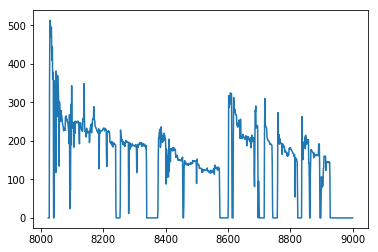

In [139]:
plt.plot(df['BORE_OIL_VOL'])

In [140]:
df[df['BORE_OIL_VOL']<10]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
8023,2014-01-12,0.00000,303.747100,98.701230,283.534860,1.181753,20.146020,20.212240,8.395740,0.0,0.0,0.0
8024,2014-01-13,0.00000,303.955410,98.733830,280.695050,1.197065,23.189020,23.260360,6.327640,0.0,0.0,0.0
8025,2014-01-14,0.00000,303.377050,98.791770,282.029910,1.125136,21.274680,21.347140,6.829930,0.0,0.0,0.0
8026,2014-01-15,0.00000,304.405040,98.102420,272.529550,2.610212,27.094350,31.875490,7.686810,0.0,0.0,0.0
8040,2014-01-29,8.14167,200.495721,106.267507,155.991354,4.616851,16.145587,44.504367,22.070023,0.0,0.0,0.0
8041,2014-01-31,19.77500,212.380542,105.598820,162.527948,3.845054,20.448241,49.852595,17.897985,0.0,0.0,0.0
8241,2014-08-20,0.00000,252.285200,103.761370,251.355570,7.906915,0.626330,0.929630,13.063280,0.0,0.0,0.0
8242,2014-08-21,0.00000,248.317930,104.194140,247.398670,8.495720,0.780600,0.919260,15.638150,0.0,0.0,0.0
8243,2014-08-22,0.00000,248.317930,104.194140,247.398670,8.495720,0.780600,0.919260,15.638150,0.0,0.0,0.0
8244,2014-08-23,0.00000,248.317930,104.194140,247.398670,8.495720,0.780600,0.919260,15.638150,0.0,0.0,0.0


In [141]:
df.drop(df.loc[df['BORE_OIL_VOL'] < 1].index, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [142]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,23.232908,206.220997,106.449231,170.064782,12.347023,9.701381,36.156215,34.231673,193.888238,29380.316044,68.363068
std,3.002571,11.234758,0.294114,13.144477,5.548000,6.797042,9.482607,7.786738,63.353156,9359.036655,92.768660
min,1.091670,193.187243,103.574034,153.683049,0.755989,0.583915,15.608422,7.036688,11.400000,2215.860000,0.000000
25%,24.000000,199.939884,106.379682,158.349606,9.973871,4.284344,30.735533,28.350329,151.405000,23291.282500,0.000000
50%,24.000000,200.533069,106.474374,166.774895,11.256136,9.549530,35.926964,32.506929,191.435000,29443.950000,9.815000
75%,24.000000,208.419977,106.602577,181.756201,12.539387,13.949938,42.732990,41.253263,225.905000,33786.167500,147.840000
max,24.000000,281.853158,107.043953,209.135599,43.017037,64.648442,92.673887,51.252433,513.120000,77600.880000,352.290000


In [143]:
df.isna().sum()

DATEPRD                     0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_CHOKE_SIZE_P            0
DP_CHOKE_SIZE               0
AVG_WHP_P                   0
AVG_WHT_P                   0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

In [144]:
df[df['BORE_WAT_VOL'] <10].count()

DATEPRD                     398
ON_STREAM_HRS               398
AVG_DOWNHOLE_PRESSURE       398
AVG_DOWNHOLE_TEMPERATURE    398
AVG_DP_TUBING               398
AVG_CHOKE_SIZE_P            398
DP_CHOKE_SIZE               398
AVG_WHP_P                   398
AVG_WHT_P                   398
BORE_OIL_VOL                398
BORE_GAS_VOL                398
BORE_WAT_VOL                398
dtype: int64

In [145]:
df[df['BORE_WAT_VOL'] <10]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
8027,2014-01-16,24.00000,241.770858,104.898944,185.900111,8.660590,27.966259,55.870746,16.900088,351.05,52394.90,0.00
8028,2014-01-17,24.00000,213.851844,106.292729,162.213858,9.470373,22.346976,51.637986,22.362967,485.34,72058.82,0.00
8029,2014-01-18,24.00000,206.614838,106.375279,157.925701,9.687738,19.858915,48.689137,22.230421,513.12,77600.88,0.00
8030,2014-01-19,24.00000,203.074779,106.392210,156.509777,9.730942,18.043991,46.565003,20.959422,497.55,72928.16,0.00
8031,2014-01-20,24.00000,203.980613,106.316921,157.110392,9.401242,18.355370,46.870221,21.193559,469.59,67199.15,0.00
8032,2014-01-21,24.00000,201.567832,106.334635,155.712566,9.581255,17.349329,45.855266,22.554590,479.09,68123.46,0.00
8033,2014-01-22,24.00000,199.666169,106.343168,154.667525,9.535895,16.499836,44.998643,22.470558,495.13,69287.43,0.00
8034,2014-01-23,24.00000,200.192404,106.296502,155.057177,9.414595,16.587401,45.135227,23.343975,430.23,60809.77,0.00
8035,2014-01-24,24.00000,200.637579,106.267544,155.432639,9.400359,16.686860,45.204941,22.776149,409.09,58874.59,0.00
8036,2014-01-25,24.00000,200.993388,106.247573,155.745699,9.358247,16.706173,45.247689,26.750427,443.84,65515.40,0.00


In [146]:
df['BORE_WAT_VOL'] = df['BORE_WAT_VOL'].apply(lambda x: x + 10 if x < 100 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [147]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,23.232908,206.220997,106.449231,170.064782,12.347023,9.701381,36.156215,34.231673,193.888238,29380.316044,74.955757
std,3.002571,11.234758,0.294114,13.144477,5.548000,6.797042,9.482607,7.786738,63.353156,9359.036655,88.315762
min,1.091670,193.187243,103.574034,153.683049,0.755989,0.583915,15.608422,7.036688,11.400000,2215.860000,10.000000
25%,24.000000,199.939884,106.379682,158.349606,9.973871,4.284344,30.735533,28.350329,151.405000,23291.282500,10.000000
50%,24.000000,200.533069,106.474374,166.774895,11.256136,9.549530,35.926964,32.506929,191.435000,29443.950000,19.815000
75%,24.000000,208.419977,106.602577,181.756201,12.539387,13.949938,42.732990,41.253263,225.905000,33786.167500,147.840000
max,24.000000,281.853158,107.043953,209.135599,43.017037,64.648442,92.673887,51.252433,513.120000,77600.880000,352.290000


In [149]:
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
8027,2014-01-16,24.0,241.770858,104.898944,185.900111,8.660590,27.966259,55.870746,16.900088,351.05,52394.90,10.0
8028,2014-01-17,24.0,213.851844,106.292729,162.213858,9.470373,22.346976,51.637986,22.362967,485.34,72058.82,10.0
8029,2014-01-18,24.0,206.614838,106.375279,157.925701,9.687738,19.858915,48.689137,22.230421,513.12,77600.88,10.0
8030,2014-01-19,24.0,203.074779,106.392210,156.509777,9.730942,18.043991,46.565003,20.959422,497.55,72928.16,10.0
8031,2014-01-20,24.0,203.980613,106.316921,157.110392,9.401242,18.355370,46.870221,21.193559,469.59,67199.15,10.0


In [150]:
df.to_csv("F15.csv")

In [152]:
df = Well_7[['DATEPRD','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P',
             'DP_CHOKE_SIZE','AVG_WHP_P', 'AVG_WHT_P','BORE_OIL_VOL',
            'BORE_GAS_VOL', 'BORE_WAT_VOL']]

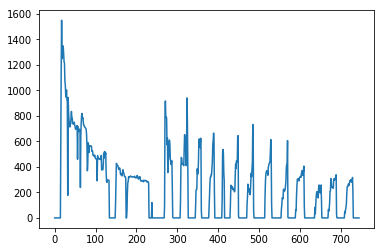

In [153]:
plt.plot(df['BORE_OIL_VOL'])

In [154]:
df[df['BORE_OIL_VOL'] < 10]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2014-04-07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,2014-04-08,0.00000,NaN,NaN,NaN,1.003059,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,2014-04-09,0.00000,NaN,NaN,NaN,0.979008,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,2014-04-10,0.00000,NaN,NaN,NaN,0.545759,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,2014-04-11,0.00000,310.376140,96.875890,277.278260,1.215987,33.071950,33.097880,10.479920,0.0,0.0,0.0
5,2014-04-12,0.00000,303.500780,96.923390,281.447440,3.087015,22.053340,22.053340,8.704290,0.0,0.0,0.0
6,2014-04-13,0.00000,303.534810,96.958850,276.032000,1.962365,16.163260,27.502810,9.423150,0.0,0.0,0.0
7,2014-04-14,0.00000,303.782280,96.968730,282.786760,0.000000,20.737120,20.995520,8.131370,0.0,0.0,0.0
8,2014-04-15,0.00000,303.858210,97.021360,289.940670,31.141856,12.181530,13.917540,8.498330,0.0,0.0,0.0
9,2014-04-16,0.00000,303.791870,97.065690,299.671930,0.000000,1.490200,4.119940,8.821240,0.0,0.0,0.0


In [155]:
df.drop(df.loc[df['BORE_OIL_VOL'] < 1].index, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [156]:
df.isna().sum()

DATEPRD                     0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_CHOKE_SIZE_P            0
DP_CHOKE_SIZE               0
AVG_WHP_P                   0
AVG_WHT_P                   0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

In [157]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,23.077059,230.714400,108.010724,188.100251,50.520575,17.150934,42.614149,61.565292,414.239580,61633.636294,483.219674
std,3.549438,17.806203,0.457228,22.517100,8.820773,13.528326,15.450558,10.297142,243.425893,34477.054072,347.760077
min,1.000000,207.218976,105.031817,154.685158,6.643884,0.194397,6.544700,17.865175,1.260000,250.790000,0.000000
25%,24.000000,219.474362,107.971137,171.445014,47.732310,8.059333,32.318033,55.955302,275.220000,43076.570000,235.040000
50%,24.000000,224.558906,108.111384,184.037504,50.763973,12.082661,37.584401,60.130510,342.990000,51937.640000,337.830000
75%,24.000000,240.637585,108.215040,203.594189,53.833058,22.798340,50.015873,69.988866,519.640000,76979.080000,765.820000
max,25.000000,298.435587,108.502178,253.263747,93.635429,78.935409,107.362050,83.420484,1549.810000,221707.310000,1645.080000


In [158]:
df['BORE_WAT_VOL'] = df['BORE_WAT_VOL'].apply(lambda x: x + 10 if x < 100 else x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [159]:
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
15,2014-04-22,24.0,289.421362,106.353209,182.059312,43.343451,78.935409,107.362050,37.939251,631.47,90439.09,10.0
16,2014-04-23,24.0,270.239793,107.643779,171.052782,47.167523,70.627109,99.187011,60.756579,1166.46,165720.39,10.0
17,2014-04-24,24.0,262.842747,107.869234,168.241977,47.732310,66.049151,94.600770,63.046800,1549.81,221707.31,10.0
18,2014-04-25,24.0,255.526995,107.971137,165.538903,48.533769,61.405386,89.988092,64.547229,1248.70,178063.52,10.0
19,2014-04-26,24.0,247.199052,108.052030,162.422242,49.844502,56.147906,84.776810,65.723694,1345.78,192602.19,10.0


In [160]:
df.to_csv("F1.csv")

In [161]:
df = Well_2[['DATEPRD','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P',
             'DP_CHOKE_SIZE','AVG_WHP_P', 'AVG_WHT_P','BORE_OIL_VOL',
            'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL']]

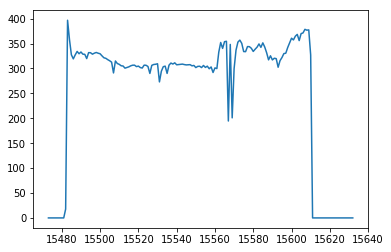

In [162]:
plt.plot(df['BORE_OIL_VOL'])

In [163]:
df.isna().sum()

DATEPRD                        0
ON_STREAM_HRS                133
AVG_DOWNHOLE_PRESSURE       3306
AVG_DOWNHOLE_TEMPERATURE    3306
AVG_DP_TUBING               3306
AVG_CHOKE_SIZE_P            3146
DP_CHOKE_SIZE                134
AVG_WHP_P                   3146
AVG_WHT_P                   3155
BORE_OIL_VOL                3146
BORE_GAS_VOL                3146
BORE_WAT_VOL                3146
BORE_WI_VOL                  590
dtype: int64

In [164]:
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
12328,2007-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12329,2007-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12330,2007-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12331,2007-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12332,2007-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df.to_csv("F5.csv")

In [166]:
df = Well_1[['DATEPRD','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P',
             'DP_CHOKE_SIZE','AVG_WHP_P', 'AVG_WHT_P','BORE_OIL_VOL',
            'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL']]

In [167]:
df.to_csv("F4.csv")